In [3]:

import numpy             as np
import matplotlib.pyplot as plt
import glob
import h5py as h
%matplotlib inline

In [4]:
def Hist2d(title,Energys,Times,binss,xlimit,ylimit):
    fig,ax = plt.subplots(figsize=(8,8))
    plt.hist2d(Energys,Times,bins=binss,cmap=plt.cm.BuGn_r)
    plt.title(title)

    plt.ylabel("Energy keV",fontsize=26)
    plt.xlabel("Time us",fontsize=26)
    plt.tick_params('both', length=10, width=2, which='major')
    plt.tick_params('both', length=5, width=1, which='minor')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.xlim(xlimit)
    plt.ylim(ylimit)
    plt.grid(True)
    plt.tight_layout()

    plt.savefig('/home/ilker/Dropbox/nexus/build/source/'+title + '.png')
    plt.show()
    
def Hist1d(title,Energys,Bins,xlimit,ylimit):
    fig, ax = plt.subplots(figsize=(8,8))
    plt.hist(Energys,bins=Bins,alpha=0.7,label=title)
    plt.ylabel("Counts",fontsize=26)
    plt.xlabel("Energy keV",fontsize=26)
    plt.tick_params('both', length=10, width=2, which='major')
    plt.tick_params('both', length=5, width=1, which='minor')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.legend(loc='upper right',fontsize=24,shadow=True, fancybox=True)
    plt.xlim(xlimit)
    plt.ylim(ylimit)
    plt.grid(True)
    plt.tight_layout()

    #plt.savefig('/Users/austinmcdonald/Desktop/'+title + '.png')
    plt.show()
    

In [1]:

def ReadFile(f):
    #OpenFile Using Tables
    #Tab = tables.open_file(H5file,mode='r')
    #Main=Tab.root.MC
    f=h.File(f,'r')   
    MC=f['MC']
    return MC

def Analyze1v(EnergyE,EnergyGamma,EnergyMother,decaytime):
     
    #dataInGas = main.hits
    #this is how you seperate the energys from the event data
    ParticleTable=MC['particles']
    Hits=MC['hits']
   
    f_energyDifference={}
    f_energy={}
    for i in range(len(Hits)):
        if(decaytime!=0):
            if(Hits['time'][i]<=decaytime):
                Energy=Hits['energy'][i]*1000 
                ParticleId=Hits['particle_id'][i]
                if ParticleId in f_energy:
                    f_energy[ParticleId]=Energy+f_energy[ParticleId]
                else:
                    f_energy[ParticleId]=Energy
        else:
                Energy=Hits['energy'][i]*1000 
                ParticleId=Hits['particle_id'][i]
                if ParticleId in f_energy:
                    f_energy[ParticleId]=Energy+f_energy[ParticleId]
                else:
                    f_energy[ParticleId]=Energy
    #print (f_energy)
    
    for s in range(len(ParticleTable)):
        pid=ParticleTable['particle_id'][s]
        pname=ParticleTable['particle_name'][s]
        mid=ParticleTable['mother_id'][s]
        k_energy=ParticleTable['kin_energy'][s]
        
        if ( pid in f_energy):
            if pname==b'gamma':
                EnergyGamma.append(f_energy[pid])
            elif (pname==b'e-'):
                EnergyE.append(f_energy[pid])
            if (mid==pid):
               EnergyMother.append()                      

    
def Analyze2v(MC,Enre,Enr1ndgam,Enr2ndgam):
    #Get the Energy of Primary
    ParticleTable=MC['particles']
    Hits=MC['hits']
    EnergyPrime=0
    EnergyOther=0
    Pcount=0
    Ocount=0
    prpid=0
    Etotal=0
    tempEvent=0
    for p in range(len(ParticleTable)):
        E=ParticleTable["kin_energy"][p]
        Event=ParticleTable["event_id"][p]
        pid=ParticleTable["particle_id"][p]
        mid=ParticleTable["mother_id"][p]
        primary=ParticleTable["primary"][p]
        pname=ParticleTable["particle_name"][p]
        initVol=ParticleTable["initial_volume"][p]
        finalVol=ParticleTable["final_volume"][p]
        if(primary):
            EnergyPrime=E
            Pcount=Pcount+1
            prpid=pid
       
        
        if(pname==b'e-' and (initVol==b'GAS' and finalVol==b'GAS')):
            if(Event==tempEvent):
                Etotal=Etotal+E
            else:
                tempEvent=Event
                Enre.append(Etotal*1000)
                Etotal=0
        elif(pname==b'gamma' and (initVol==b'LAB' and finalVol==b'GAS')):
            Enr1ndgam.append(E*1000)
        elif(pname==b'gamma' and (initVol==b'GAS' and finalVol==b'GAS')):
            Enr2ndgam.append(E*1000)
 
    

In [2]:
#100uS Events2
File = '/home/ilker/Dropbox/nexus/build2/source/gamma31.h5'
#Files = glob.glob(path+'*.h5')
E1gamma=[]
E2gamma=[]
Ee=[]
MC=ReadFile(File)
Analyze2v(MC,Ee,E1gamma,E2gamma)

NameError: name 'h' is not defined

In [ ]:

Hist1d('Main gamma',E1gamma,np.linspace(1,200,10),(0,300),(0,100))
Hist1d('Secondary gamma',E2gamma,np.linspace(1,200,10),(0,300),(0,500))
Hist1d('Electron',Ee,np.linspace(1,150,20),(0,300),(0,500))


In [24]:
#100uS Events2
File = '/home/ilker/Dropbox/nexus/build/source/gamma31.h5'
#Files = glob.glob(path+'*.h5')
E1gamma=[]
E2gamma=[]
Ee=[]
MC=ReadFile(File)
Analyze2v(MC,Ee,E1gamma,E2gamma)

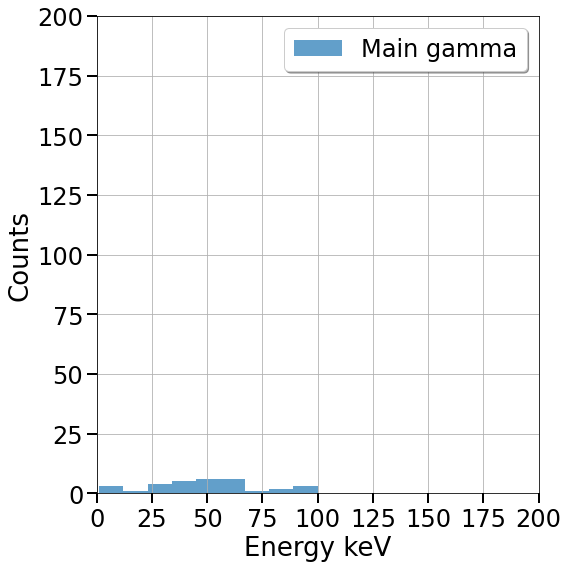

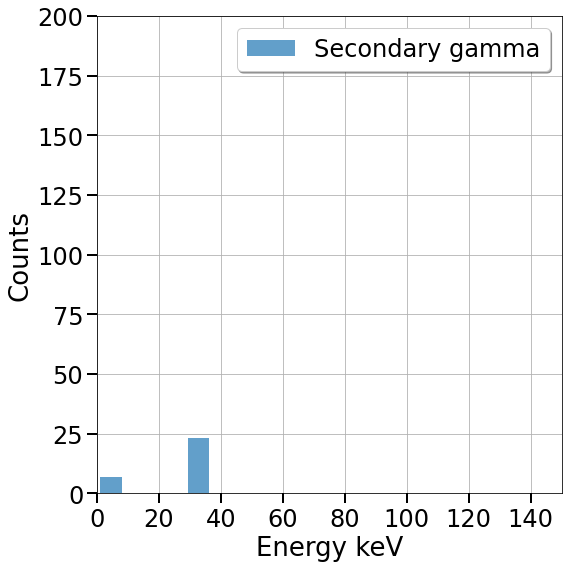

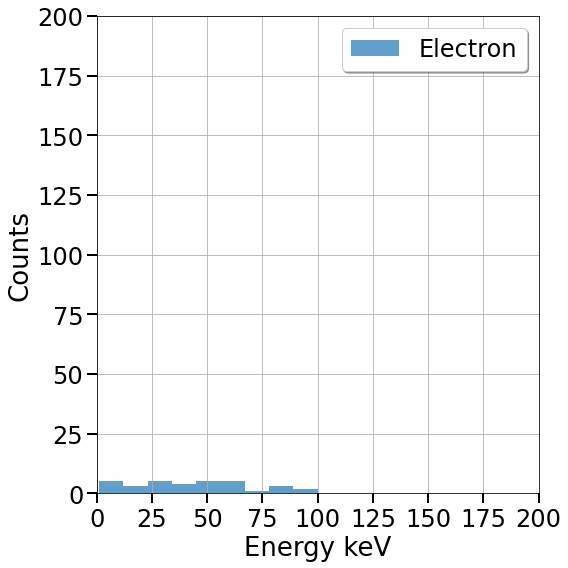

44
30
---
46


In [31]:
Hist1d('Main gamma',E1gamma,np.linspace(1,100,10),(0,200),(0,200))
Hist1d('Secondary gamma',E2gamma,np.linspace(1,100,15),(0,150),(0,200))
Hist1d('Electron',Ee,np.linspace(1,100,10),(0,200),(0,200))
#print(E1gamma)
print(len(E1gamma))
print(len(E2gamma))
print("---")
print(len(Ee))


In [ ]:
decaytime=13
Times=[]
EnergyE=[]
EnergyGamma=[]
EnergyMother=[[]]
ReadFile(File,EnergyE,EnergyGamma,decaytime)

#print(Energys)

In [ ]:

#100uS Events
File = '/home/ilker/Dropbox/nexus/build/source/Ba133_50us_100uCi_1event_.h5'
#Files = glob.glob(path+'*.h5')
decaytime=50
Times=[]
EnergyE=[]
EnergyGamma=[]
ReadFile(File,EnergyE,EnergyGamma,decaytime)
print (EnergyGamma)

#Hist1d('Ba133_50us',EnergyE,np.linspace(1,150,10),(0,150),(0,5))


In [ ]:
#100uS Events
File = '/home/ilker/Dropbox/nexus/build/source/Ba133_13us_100uCi_1event_.h5'
#Files = glob.glob(path+'*.h5')
decaytime=13
Times=[]
EnergyE=[]
EnergyGamma=[]
ReadFile(File,EnergyE,EnergyGamma,decaytime)
print (EnergyGamma)
#print (EnergyE)

In [ ]:
#Hist1d('Ba133_13us',EnergyE,np.linspace(1,150,10),(0,150),(0,5))


In [ ]:
#100uS Events
File = '/home/ilker/Dropbox/nexus/build/source/Cs137_50us_100uCi_1event_.h5'
#Files = glob.glob(path+'*.h5')
decaytime=50
Times=[]
EnergyE=[]
EnergyGamma=[]
ReadFile(File,EnergyE,EnergyGamma,decaytime)
#print (EnergyGamma)


print (EnergyE)


In [ ]:
Hist1d('CS137_Electrons_50us',EnergyE,np.linspace(1,200,10),(0,150),(0,4))


In [ ]:

#100uS Events
File = '/home/ilker/Dropbox/nexus/build/source/gamma.h5'
#Files = glob.glob(path+'*.h5')
decaytime=0
Times=[]
EnergyEg=[]
EnergygGamma=[]
ReadFile(File,EnergyEg,EnergygGamma,decaytime)
#print (EnergyGamma)





In [ ]:
Hist1d('Electron Energies',EnergyEg,np.linspace(1,500,10),(0,200),(0,5))
Hist1d('Gamma Energies',EnergygGamma,np.linspace(1,500,10),(0,200),(0,5))

print (EnergygGamma)
print(EnergyEg)
